# Train Model-Development

In [159]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
%matplotlib inline 

In [160]:
#read data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [161]:
#linear model object
model=LinearRegression()
model

LinearRegression()

### How could "highway-mpg" help us predict car price?

In [162]:
X=df[['highway-mpg']]
Y=df['price']


In [163]:
#fit
model.fit(X,Y)

LinearRegression()

In [164]:
#output prediction
Yhat=model.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [165]:
#  value of the intercept (a)?
model.intercept_

38423.305858157386

In [166]:
#slope b
model.coef_

array([-821.73337832])

In [167]:
#linear regression object called "model1".
model1=LinearRegression()
model1

LinearRegression()

In [168]:
#model using "engine-size" as the independent variable and "price" as the dependent variable
model1.fit(df[['engine-size']],df['price'])

LinearRegression()

In [169]:
#the slope and intercept of the model.
# Slope 
display(model1.coef_)

# Intercept
display(model1.intercept_)

array([166.86001569])

-7963.338906281049

In [170]:
# the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

we know that other good predictors of price could be: <br>
<br>
Horsepower<br>
Curb-weight<br>
Engine-size<br>
Highway-mpg<br>
Let's develop a model using these variables as the predictor variables.

In [171]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [172]:
#Fit the linear model 
model.fit(Z,df.price)

LinearRegression()

In [173]:
#intercept(a)?
model.intercept_

-15806.624626329198

In [174]:
#coefficients (b1, b2, b3, b4)
model.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [175]:
model2 = LinearRegression()
model2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [176]:
# coefficient of the model.
model2.coef_

array([   1.49789586, -820.45434016])

### Regression Plot

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0.0, 48166.68410069867)

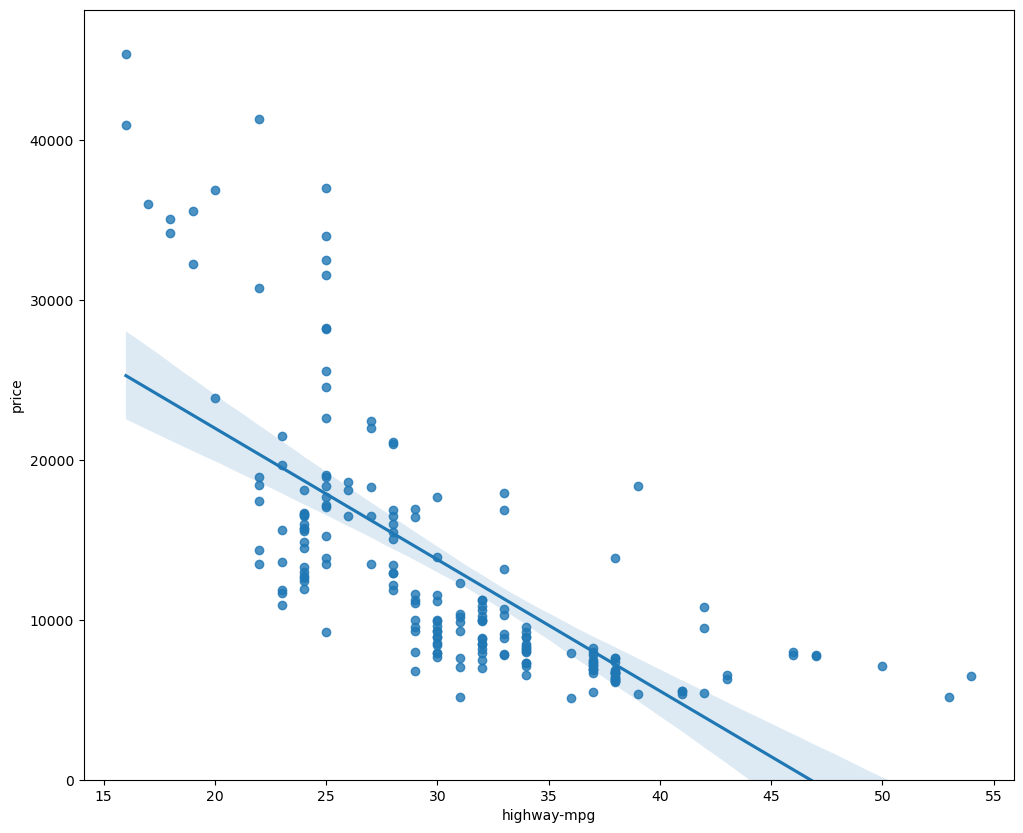

In [177]:
#Let's visualize highway-mpg as potential predictor variable of price:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

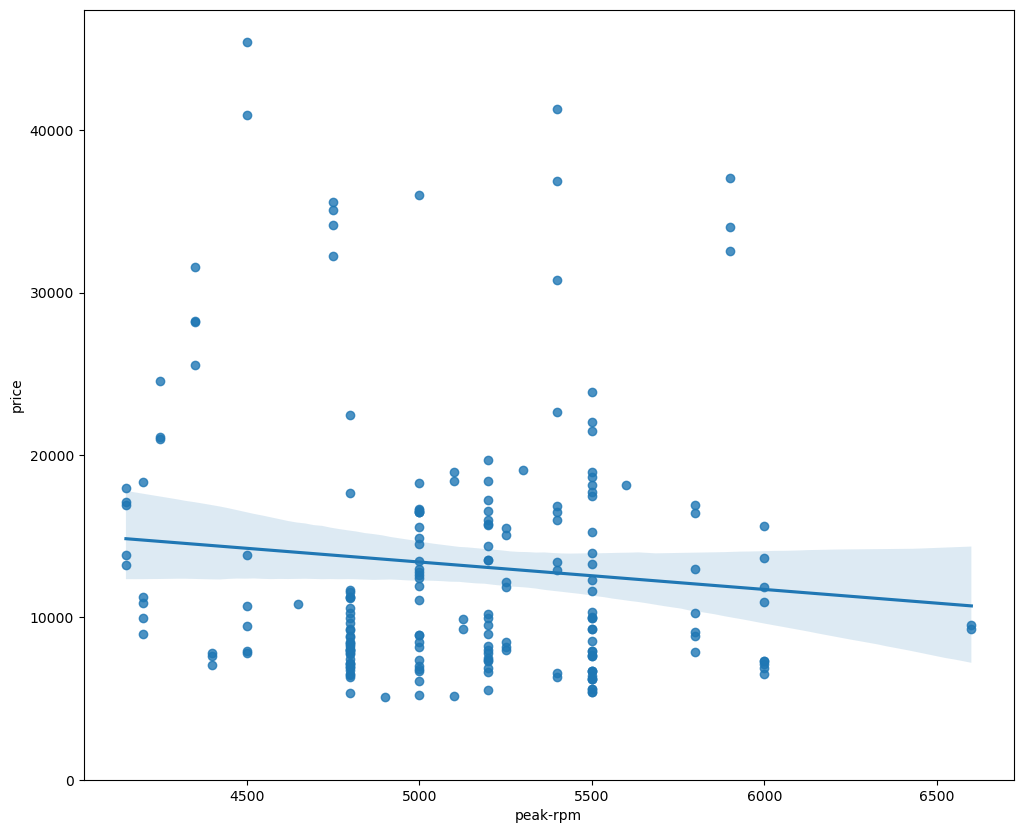

In [178]:
#Let's compare this plot to the regression plot of "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [179]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

C:\Users\DELL\AppData\Local\Temp\ipykernel_2164\881434699.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\DELL\AppData\Local\Temp\ipykernel_2164\881434699.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

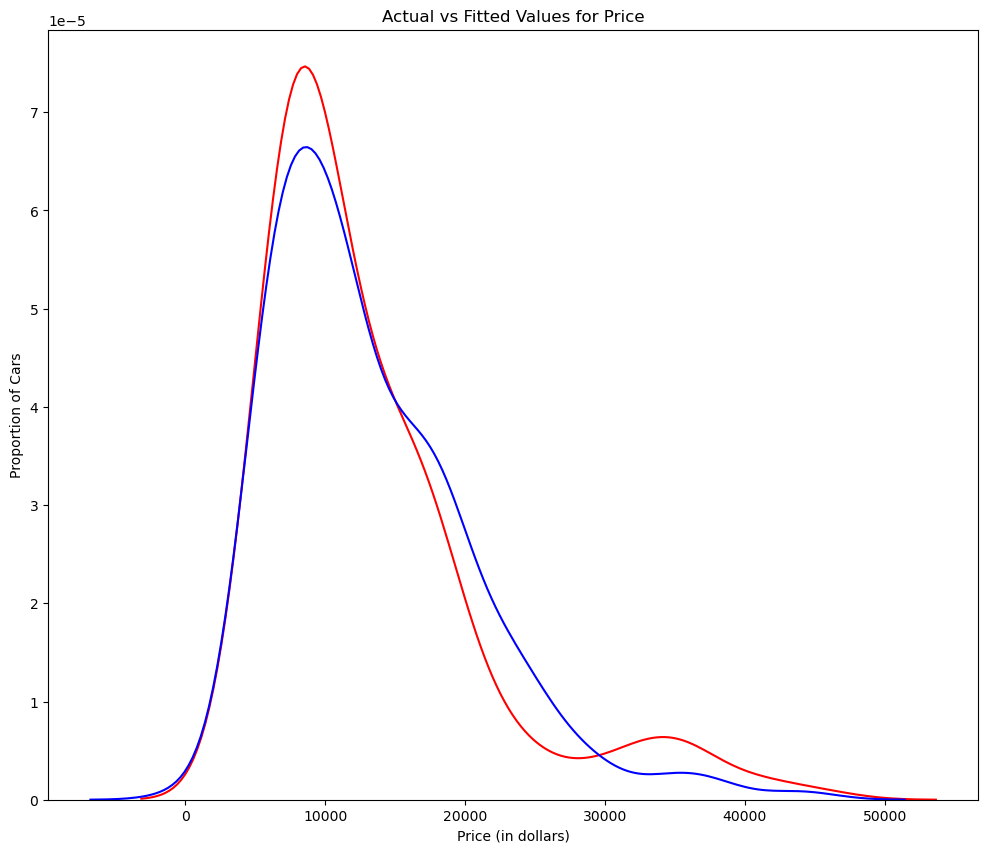

In [180]:
Y_hat=model.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')


plt.show()
plt.close()

### Polynomial Regression and Pipelines

In [181]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [182]:
x = df['highway-mpg']
y = df['price']

In [183]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


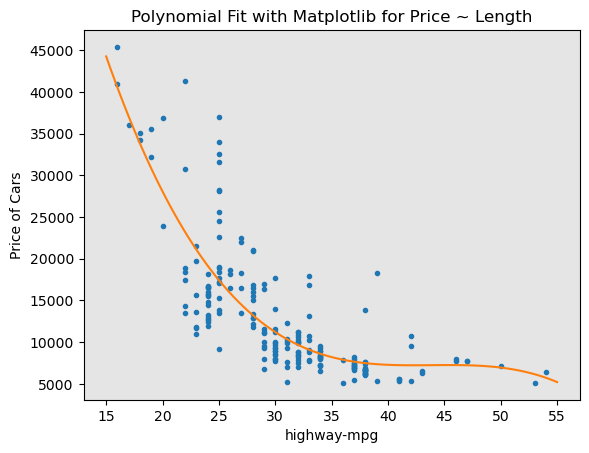

In [184]:
PlotPolly(p, x, y, 'highway-mpg')

In [185]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


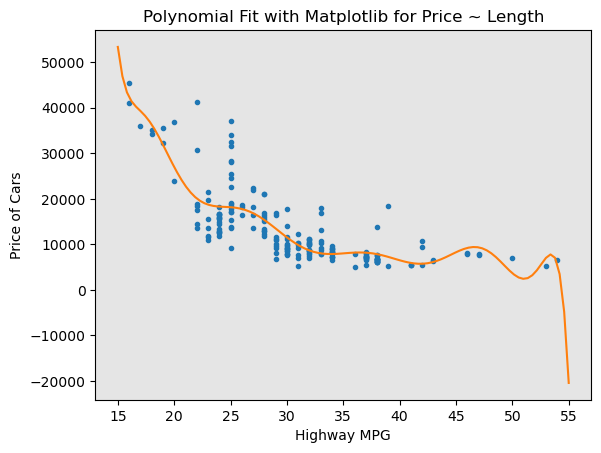

In [186]:
#Create 11 order polynomial mode
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [187]:
#We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

In [188]:
#In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [189]:
#After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [190]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [191]:
pipi=Pipeline(Input)
pipi

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [192]:
Z = Z.astype(float)
pipi.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [193]:
 #Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.
ypipi=pipi.predict(Z)
ypipi[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [194]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Measures for In-Sample Evaluation

#### Model 1: Simple Linear Regression

In [195]:
#highway_mpg_fit
model.fit(X, Y)
# Find the R^2
print('The R-square is: ',model.score(X, Y))

The R-square is:  0.4965911884339175


In [196]:
#We can predict the output i.e., "yhat" using the predict method, where X is the input variabl
Yhat=model.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [197]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


#### Model 2: Multiple Linear Regression

In [198]:
model.fit(Z,df['price'])
print(model.score(Z,df['price']))

0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

We produce a prediction:

In [199]:
y_pred_multifit=model.predict(Z)
mean_squared_error(df['price'],y_pred_multifit)

11980366.87072649

#### Model 3: Polynomial Fit

In [200]:
r_squared=r2_score(y,p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


### MSE

In [201]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### 5. Prediction and Decision Making

<h4>Prediction</h4>
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy

In [208]:
#Create a new input:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [209]:
#Fit the model:
model.fit(X,y)
model

LinearRegression()

In [210]:
#Produce a prediction:
yhat=model.predict(new_input)
yhat

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  

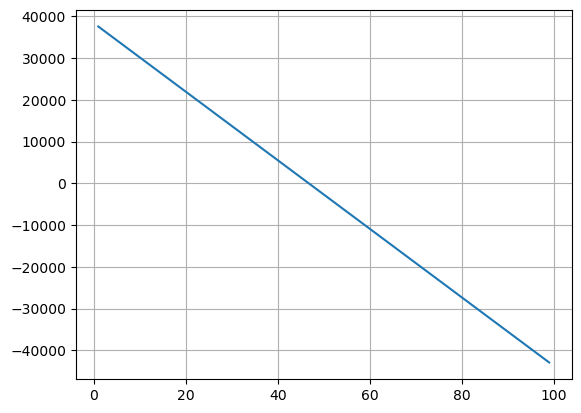

In [214]:
plt.plot(new_input,yhat)
plt.grid()
plt.show()